In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
query = """
SELECT c.Term_Code
, c.Start_Date
, AVG(c.Grade) as avg_grade
, STDEV(c.Grade) as stdev_grade
, COUNT(c.student_id_fk) as cnt_grade
, SQRT(STDEV(c.Grade))/COUNT(c.student_id_fk) AS confidence_interval
FROM Courses AS c
WHERE c.student_id_fk IN (
SELECT DISTINCT m.student_id_fk
FROM Majors AS m
WHERE m.dept_name = 'Physics-Astronomy'
AND m.Student_Level_Code = 'UN'
)
AND c.Subj_Code = 'PHY'
AND c.Crse_Code = '183'
AND Term_Code NOT LIKE '%U%'
GROUP BY c.Term_Code, c.Start_Date
ORDER BY c.Start_Date ASC
"""

df183 = pd.read_csv('data/physics183grades.csv', names=['termcode', 'dt', 'avg_grade', 'stdev_grade', 'cnt_grade', 'confidence interval'])
df183['dt'] = pd.to_datetime(df183['dt'])
df183.set_index('dt', inplace=True)

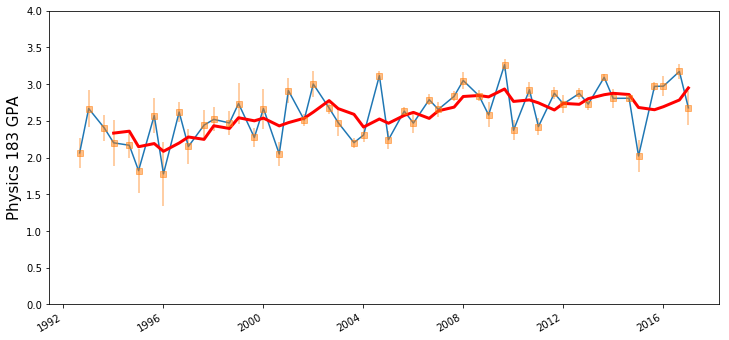

In [37]:
fig, ax =plt.subplots(figsize=(12, 6))

# ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
# ax.set_title('H, V asymmetric')

x = df183.index.values
y = df183.avg_grade.values
yerror = df183['confidence interval'].values * 5

ax.plot(x, y)
ax.errorbar(x, y, yerr=yerror, fmt='s', alpha=0.5)

df183['avg_grade'].rolling(window=4).mean().plot(color='red', linewidth=3, ax=ax)

ax.set_ylim(0, 4)
ax.set_xlabel('')
ax.set_ylabel('Physics 183 GPA', fontsize=15)

dt
1992-09-02         NaN
1993-01-12         NaN
1993-08-30         NaN
1994-01-12    2.332292
1994-08-29    2.358333
1995-01-11    2.147024
1995-08-28    2.189881
1996-01-10    2.084325
1996-08-26    2.197421
1997-01-08    2.279563
1997-08-25    2.247000
1998-01-14    2.432364
1998-08-31    2.395249
1999-01-11    2.541572
1999-08-30    2.499460
2000-01-10    2.536319
2000-08-28    2.430577
2001-01-08    2.474694
2001-08-27    2.534718
2002-01-07    2.618051
2002-08-26    2.774896
2003-01-06    2.665705
2003-08-25    2.588032
2004-01-12    2.414736
2004-08-30    2.524495
2005-01-10    2.466460
2005-08-29    2.573822
2006-01-09    2.614305
2006-08-28    2.532605
2007-01-08    2.635581
2007-08-27    2.686020
2008-01-07    2.830929
2008-08-25    2.844348
2009-01-12    2.825657
2009-09-02    2.933114
2010-01-11    2.763759
2010-09-01    2.784000
2011-01-10    2.744263
2011-08-31    2.647224
2012-01-09    2.736914
2012-08-29    2.724531
2013-01-07    2.801086
2013-08-28    2.855063
2014-01-